<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

In [2]:
import numpy as np
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

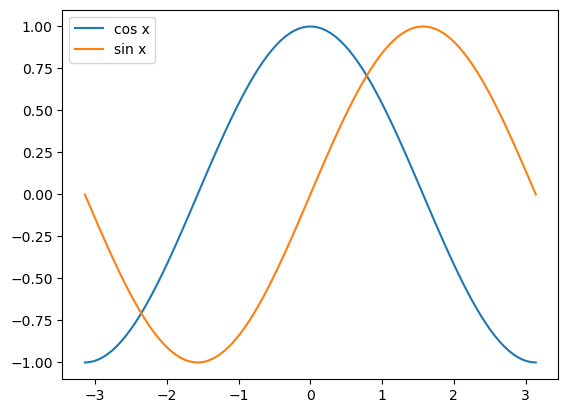

In [3]:
from matplotlib import pyplot as plt
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

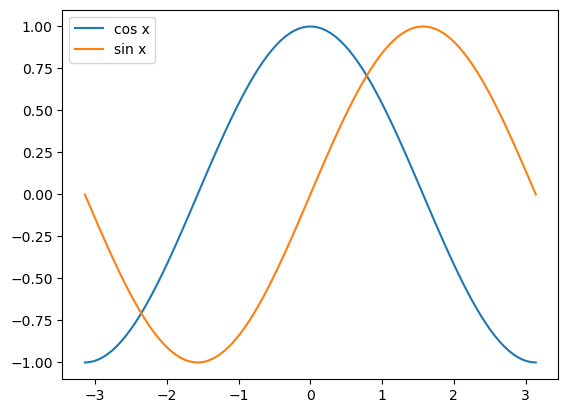

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

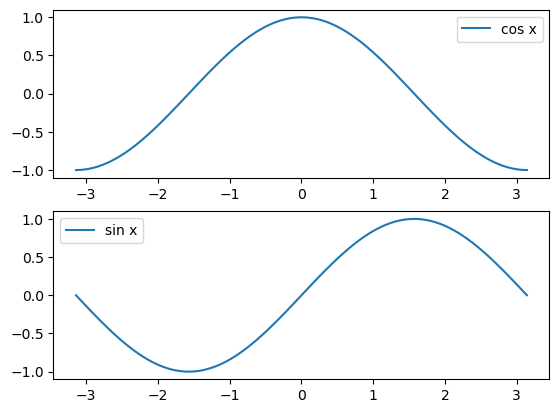

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [ ]:
type(ax)
#ax is a numpy array

numpy.ndarray

In [ ]:
ax.shape
#ax has 2 'things'

(2,)

In [11]:
type(ax[0])
#matplotlib axis

matplotlib.axes._axes.Axes

# 4 A complete OO example

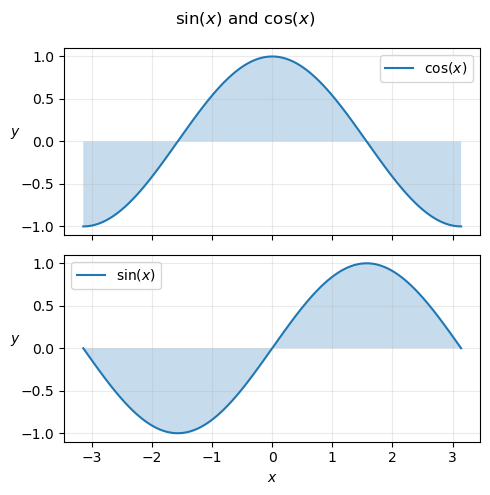

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), sharex=True)
#sharex asks that the plot share the x-axis
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
#fills in the plots (x coordinates defining the curve, y coordinates of first curve, y coordinates of second curve)
#is y2 not given, default is y=0
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')
#sharing x axis hence can just label lowest plot

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
#adds a super title to the figure
fig.tight_layout()

# 5 Multiple rows and columns

### Using ax

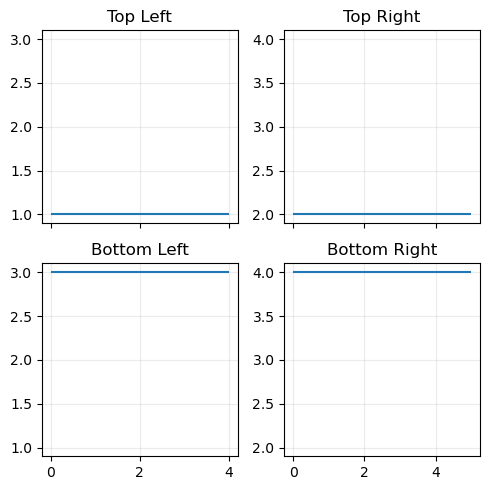

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()
#flatten() takes 2d array and flattens into 1d array

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.1 Sharing axes

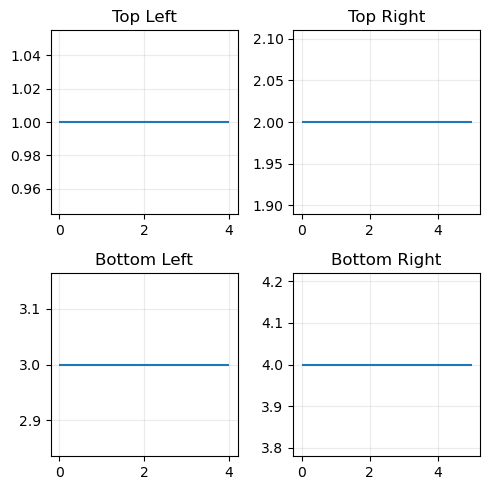

In [24]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

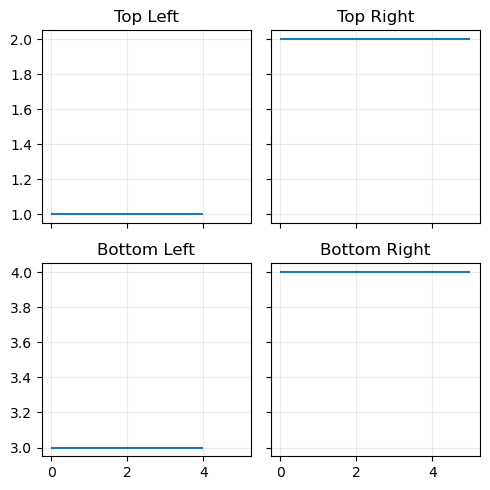

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

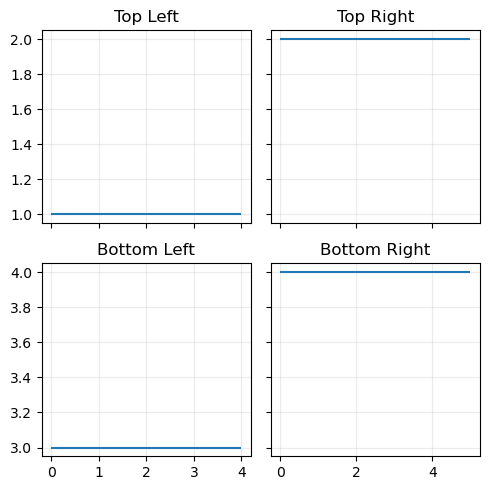

In [26]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.2 Accessing all axes

In [ ]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [27]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

In [28]:
get_plot_data()

{'All': array([3701., 2850., 3053., ..., 3856., 3303., 3245.], shape=(1007,)),
 'NUS': array([2741., 3057., 3098., 2960., 3404., 2740., 3065., 3350., 3933.,
        3277., 3266., 4106., 3007., 2961., 2839., 2823., 3245., 3140.,
        3592., 3286., 2940., 3153., 3330., 3036., 3155., 4922., 4406.,
        2687., 2896., 2850., 2726., 3101., 3473., 2719., 3141., 3192.,
        3234., 3979., 2836., 3350., 3107., 3729., 3183., 3684., 4054.,
        4290., 2600., 3089., 2931., 2966., 3277., 3212., 3674., 3306.,
        3375., 3250., 3591., 3054., 3160., 5027., 4404., 2976., 3123.,
        2760., 2804., 3224., 3467., 2839., 3266., 3317., 3164., 4173.,
        2817., 3547., 3230., 3847., 3255., 3597., 4053., 4054., 2907.,
        2989., 3146., 3256., 3400., 3300., 4119., 3452., 3768., 3318.,
        3624., 3121., 3279., 4866., 4352., 3175., 3219., 3244., 3203.,
        2859., 3245., 3431., 3400., 2971., 3258., 3341., 4173., 3314.,
        3414., 3402., 3884., 3669., 3549., 3432., 3788., 3381.

### The histogram

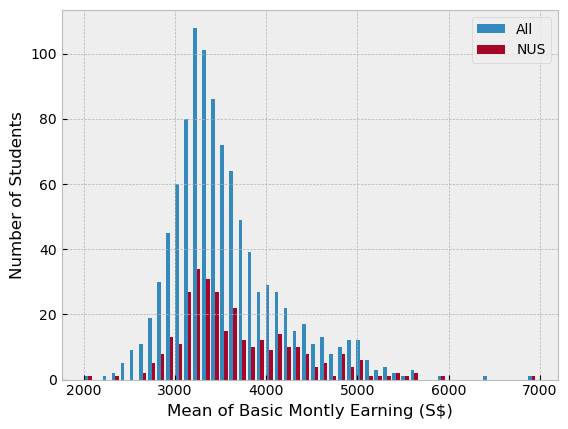

In [29]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

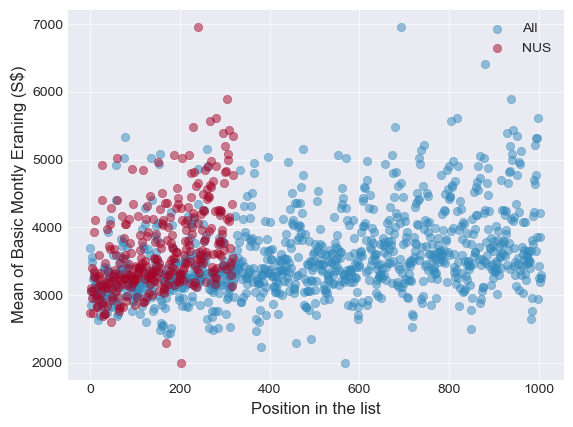

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

#items() accesses the pair of 'key: value'
for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

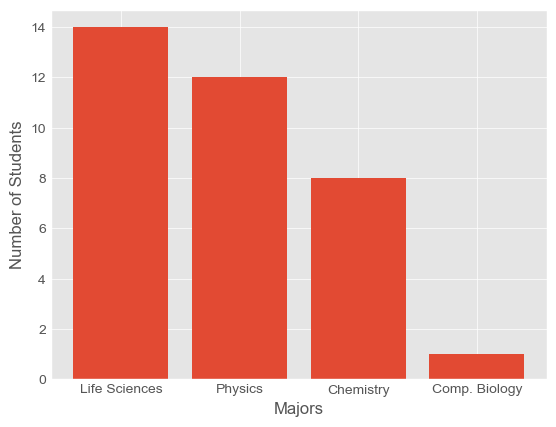

In [ ]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
#use barh() for horizontal bars
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

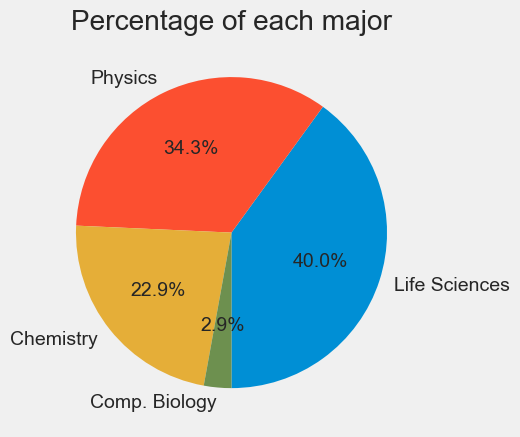

In [33]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')
#startangle by default is 0 (along x-axis, at 3 oclock)